In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
trans = pd.read_csv("transaction", header = None)
trans = trans.iloc[:, :-1]
trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,4558802,7603,660,1400,654201796,2005-08-15,P,1,32.0,16.0,983300056,697
1,4558802,7604,570,10100,0,2005-08-27,P,1,32.0,11.2,920600175,697
2,4558802,7702,210,400,0,2005-06-05,R,1,32.0,32.0,261600047,697
3,4558802,7702,210,1000,573605828,2005-05-29,P,1,32.0,32.0,297000055,697
4,4558802,7702,210,3100,0,2005-08-24,P,1,32.0,11.2,93700118,697


In [4]:
trans.columns = ['SKU', 'StoreID', 'Register', 'Transaction_Code', \
                'Sequence', 'Date', 'InterID', 'Stype', \
                'Quantity', 'Original_Price', 'AMT', 'MIC']

In [5]:
trans.head()

,SKU,StoreID,Register,Transaction_Code,Sequence,Date,InterID,Stype,Quantity,Original_Price,AMT,MIC
0,4558802,7603,660,1400,654201796,2005-08-15,P,1,32.0,16.0,983300056,697
1,4558802,7604,570,10100,0,2005-08-27,P,1,32.0,11.2,920600175,697
2,4558802,7702,210,400,0,2005-06-05,R,1,32.0,32.0,261600047,697
3,4558802,7702,210,1000,573605828,2005-05-29,P,1,32.0,32.0,297000055,697
4,4558802,7702,210,3100,0,2005-08-24,P,1,32.0,11.2,93700118,697


In [6]:
trans.shape

(120916896, 12)

In [5]:
50000000 / 120916896

0.41350714130141086

In [ ]:
# Take very small subset

In [9]:
trans_sub = trans.sample(n = 60000000, random_state = 42)
trans_sub

,SKU,StoreID,Register,Transaction_Code,Sequence,Date,InterID,Stype,Quantity,Original_Price,AMT,MIC
93248685,2477607,2307,860,6300,0,2005-07-02,P,1,80.0,53.60,958900058,45
55346863,9243610,1103,110,1500,17609052,2005-07-01,P,1,49.5,12.38,100100021,542
110850552,3844099,4907,350,4600,0,2004-08-13,P,1,14.5,14.50,44300070,281
61115855,9693111,8407,730,500,0,2004-11-21,P,1,28.0,28.00,611200015,690
27109600,6746773,2203,730,3500,521204390,2005-07-13,P,1,48.0,5.99,699100021,543
...,...,...,...,...,...,...,...,...,...,...,...,...
35071006,7457628,2707,690,15300,736605587,2004-12-15,P,1,18.0,13.50,484000143,15
42074345,8079904,5403,660,600,349105922,2004-11-13,P,1,4.0,4.00,348400117,146
115421494,4126716,9804,360,7300,0,2004-12-02,P,1,24.0,14.99,836700090,663
66356522,140436,5903,110,700,176608970,2004-10-28,P,1,5.0,5.00,170400004,34


In [ ]:
# We are focusing on the returns, which is Stype

In [8]:
trans['Stype'].nunique()

8

In [9]:
trans.groupby('Stype').count()['SKU']

Stype
1     120916889
10            1
40            1
43            1
70            1
80            1
82            1
90            1
Name: SKU, dtype: int64

In [10]:
trans.groupby(['Date', 'Stype']).count()['SKU']

Date        Stype
2004-08-01  1        204266
2004-08-02  1        196575
2004-08-03  1        230889
2004-08-04  1        236191
2004-08-05  1        243426
                      ...  
2005-08-24  1        496976
            43            1
2005-08-25  1        455534
2005-08-26  1        518866
2005-08-27  1        771760
Name: SKU, Length: 396, dtype: int64

In [ ]:
# Use subset

In [10]:
def get_year(x):
    return x[:4]

def get_month(x):
    return x[5:7]

def get_day(x):
    return x[-2:]

In [11]:
trans_sub['Year'] = trans_sub['Date'].apply(get_year)

In [12]:
trans_sub['Month'] = trans_sub['Date'].apply(get_month)

In [14]:
trans_sub['Day'] = trans_sub['Date'].apply(get_day)

In [15]:
trans_sub.head()

,SKU,StoreID,Register,Transaction_Code,Sequence,Date,InterID,Stype,Quantity,Original_Price,AMT,MIC,Year,Month,Day
93248685,2477607,2307,860,6300,0,2005-07-02,P,1,80.0,53.60,958900058,45,2005,07,02
55346863,9243610,1103,110,1500,17609052,2005-07-01,P,1,49.5,12.38,100100021,542,2005,07,01
110850552,3844099,4907,350,4600,0,2004-08-13,P,1,14.5,14.50,44300070,281,2004,08,13
61115855,9693111,8407,730,500,0,2004-11-21,P,1,28.0,28.00,611200015,690,2004,11,21
27109600,6746773,2203,730,3500,521204390,2005-07-13,P,1,48.0,5.99,699100021,543,2005,07,13


In [ ]:
# Groupby each year and stype and check the count

In [16]:
sub_year = trans_sub.groupby(['Year', 'Stype']).count().reset_index()
sub_year = sub_year[['Year', 'Stype', 'SKU']]
sub_year

,Year,Stype,SKU
0,2004,1,22876835
1,2004,40,1
2,2005,1,37123160
3,2005,70,1
4,2005,80,1
5,2005,82,1
6,2005,90,1


In [14]:
sub_month = trans_sub.groupby(['Month', 'Stype']).count().reset_index()
sub_month = sub_month[['Month', 'Stype', 'SKU']]
sub_month

,Month,Stype,SKU
0,01,1,4441481
1,01,82,1
2,02,1,5633878
3,03,1,4437335
4,03,70,1
5,03,80,1
6,04,1,4507293
7,05,1,3828793
8,06,1,3930636
9,07,1,5517985


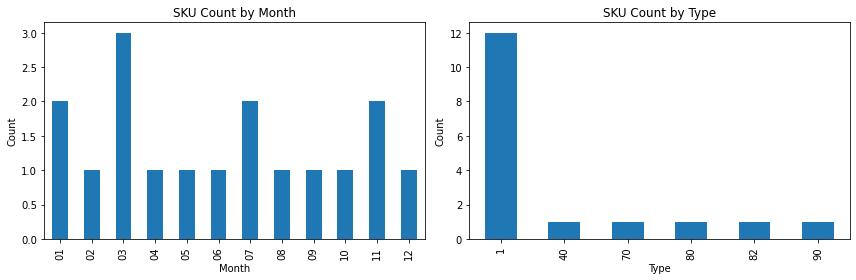

In [20]:
# Create a subplot with two axes (for SKUs by month and SKUs by type)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot SKU counts by month
sku_by_month = sub_month.groupby('Month')['SKU'].count()
sku_by_month.plot(kind='bar', ax=ax1)
ax1.set_title('SKU Count by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')

# Plot SKU counts by type
sku_by_type = sub_month.groupby('Stype')['SKU'].count()
sku_by_type.plot(kind='bar', ax=ax2)
ax2.set_title('SKU Count by Type')
ax2.set_xlabel('Type')
ax2.set_ylabel('Count')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
sub_day = trans_sub.groupby(['Day', 'Stype']).count().reset_index()
sub_day = sub_day[['Day', 'Stype', 'SKU']]
sub_day

,Day,Stype,SKU
0,01,1,1871091
1,02,1,2030406
2,02,40,1
3,03,1,1749799
4,04,1,1985452
5,04,82,1
6,05,1,2169522
7,06,1,2032701
8,07,1,1853343
9,08,1,1755447


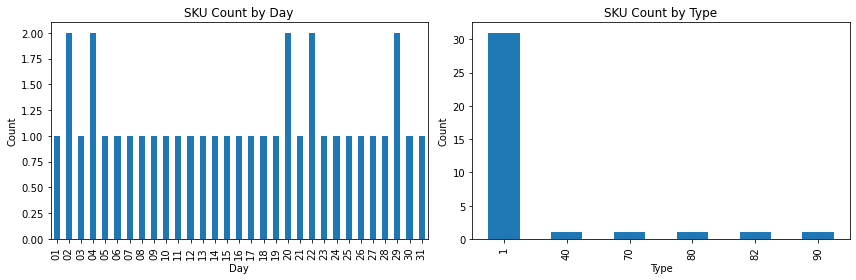

In [23]:
# Create a subplot with two axes (for SKUs by month and SKUs by type)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot SKU counts by month
sku_by_day = sub_day.groupby('Day')['SKU'].count()
sku_by_day.plot(kind='bar', ax=ax1)
ax1.set_title('SKU Count by Day')
ax1.set_xlabel('Day')
ax1.set_ylabel('Count')

# Plot SKU counts by type
sku_by_type = sub_day.groupby('Stype')['SKU'].count()
sku_by_type.plot(kind='bar', ax=ax2)
ax2.set_title('SKU Count by Type')
ax2.set_xlabel('Type')
ax2.set_ylabel('Count')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
def season(x):
    if x in ["03", '04', '05']:
        return "Spring"
    elif x in ['06', '07', '08']:
        return "Summer"
    elif x in ['09', '10', '11']:
        return "Fall"
    else:
        return "Winter"

In [18]:
trans_sub['Season'] = trans_sub['Month'].apply(season)
trans_sub.head()

,SKU,StoreID,Register,Transaction_Code,Sequence,Date,InterID,Stype,Quantity,Original_Price,AMT,MIC,Year,Month,Day,Season
93248685,2477607,2307,860,6300,0,2005-07-02,P,1,80.0,53.60,958900058,45,2005,07,02,Summer
55346863,9243610,1103,110,1500,17609052,2005-07-01,P,1,49.5,12.38,100100021,542,2005,07,01,Summer
110850552,3844099,4907,350,4600,0,2004-08-13,P,1,14.5,14.50,44300070,281,2004,08,13,Summer
61115855,9693111,8407,730,500,0,2004-11-21,P,1,28.0,28.00,611200015,690,2004,11,21,Fall
27109600,6746773,2203,730,3500,521204390,2005-07-13,P,1,48.0,5.99,699100021,543,2005,07,13,Summer


In [29]:
sub_season = trans_sub.groupby(['Season', 'Stype']).count().reset_index()
sub_season = sub_season[['Season', 'Stype', 'SKU']]
sub_season

,Season,Stype,SKU
0,Fall,1,12123771
1,Fall,40,1
2,Spring,1,12773421
3,Spring,70,1
4,Spring,80,1
5,Summer,1,18387181
6,Summer,90,1
7,Winter,1,16715622
8,Winter,82,1


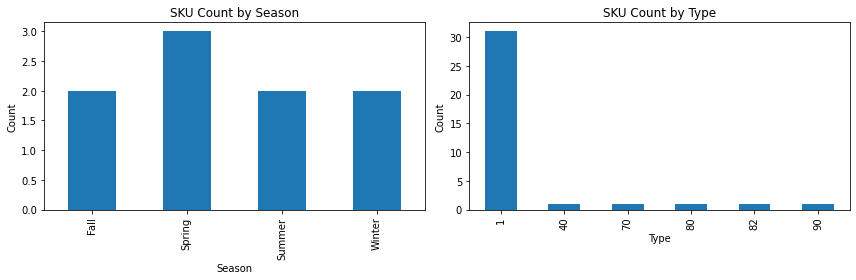

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot SKU counts by month
sku_by_season = sub_season.groupby('Season')['SKU'].count()
sku_by_season.plot(kind='bar', ax=ax1)
ax1.set_title('SKU Count by Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Count')

# Plot SKU counts by type
sku_by_type = sub_day.groupby('Stype')['SKU'].count()
sku_by_type.plot(kind='bar', ax=ax2)
ax2.set_title('SKU Count by Type')
ax2.set_xlabel('Type')
ax2.set_ylabel('Count')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Get the day of week for each date

In [19]:
def day_of_week(x):
    date_obj = datetime.strptime(x, '%Y-%m-%d')
    week_day = date_obj.weekday()
    if week_day == 0:
        return 'Monday'
    elif week_day == 1:
        return 'Tuesday'
    elif week_day == 2:
        return 'Wednesday'
    elif week_day == 3:
        return 'Thursday'
    elif week_day == 4:
        return 'Friday'
    elif week_day == 5:
        return 'Saturday'
    else:
        return 'Sunday'

In [20]:
trans_sub['Day_of_Week'] = trans_sub['Date'].apply(day_of_week)
trans_sub.head()

,SKU,StoreID,Register,Transaction_Code,Sequence,Date,InterID,Stype,Quantity,Original_Price,AMT,MIC,Year,Month,Day,Season,Day_of_Week
93248685,2477607,2307,860,6300,0,2005-07-02,P,1,80.0,53.60,958900058,45,2005,07,02,Summer,Saturday
55346863,9243610,1103,110,1500,17609052,2005-07-01,P,1,49.5,12.38,100100021,542,2005,07,01,Summer,Friday
110850552,3844099,4907,350,4600,0,2004-08-13,P,1,14.5,14.50,44300070,281,2004,08,13,Summer,Friday
61115855,9693111,8407,730,500,0,2004-11-21,P,1,28.0,28.00,611200015,690,2004,11,21,Fall,Sunday
27109600,6746773,2203,730,3500,521204390,2005-07-13,P,1,48.0,5.99,699100021,543,2005,07,13,Summer,Wednesday


In [23]:
sub_day_of_week = trans_sub.groupby(['Day_of_Week', 'Stype']).count().reset_index()
sub_day_of_week = sub_day_of_week[['Day_of_Week', 'Stype', 'SKU']]
sub_day_of_week

,Day_of_Week,Stype,SKU
0,Friday,1,10105780
1,Friday,90,1
2,Monday,1,6492848
3,Saturday,1,13693403
4,Sunday,1,6772604
5,Sunday,70,1
6,Thursday,1,8279814
7,Tuesday,1,6780188
8,Tuesday,40,1
9,Tuesday,80,1


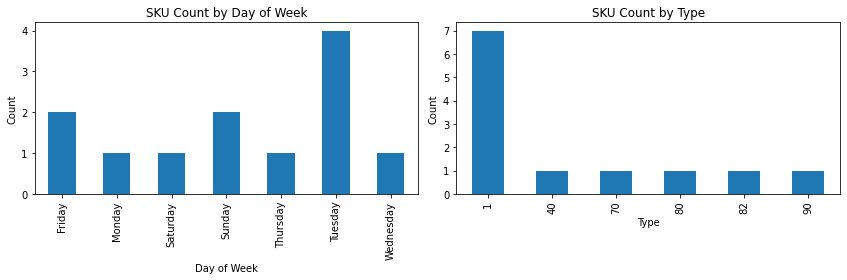

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot SKU counts by month
sku_by_dow = sub_day_of_week.groupby('Day_of_Week')['SKU'].count()
sku_by_dow.plot(kind='bar', ax=ax1)
ax1.set_title('SKU Count by Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Count')

# Plot SKU counts by type
sku_by_type = sub_day_of_week.groupby('Stype')['SKU'].count()
sku_by_type.plot(kind='bar', ax=ax2)
ax2.set_title('SKU Count by Type')
ax2.set_xlabel('Type')
ax2.set_ylabel('Count')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()